In [4]:
import pandas as pd
import quandl

print "Imporing quandl data from net"
df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]

# define special relationship which will give some intuition about the data

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100

df = df[['Adj. Close', 'HL_PCT', 'PCT_change','Adj. Volume']]

# try to define a label

forecast_col = 'Adj. Close'

# in machine learning we cannot use nan data and we can replace the data with some value
df.fillna(-9999, inplace=True)

print df.head()


Imporing quandl data from net
            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [8]:
import math

# we have defined lable
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print df.head()



            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  68.752232
2004-08-20   54.322689  0.710922    7.227007   22834300.0  69.639972
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  69.078238
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  67.839414
2004-08-25   53.164113  1.886792    1.183658    9188600.0  68.912727


In [21]:
import numpy as np # python dnt have arrays
from sklearn import preprocessing # we need scaling on features to be between -1 to 1
from sklearn import cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])


# scale x, for streaming data we have to scale this along with all the data
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# call the classifier
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)

# get the score
accuracy = clf.score(X_test,y_test)

print accuracy

# lets use svm
clf = svm.SVR(kernel = 'rbf')
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print accuracy



0.974292752213
0.756255649264


# we can see svm is giving bad performance

In [22]:
# fifth tutorial in machine learning with sentdex

In [23]:
X = X[:-forecast_out]
X_latly = X[-forcast_out:]
print X
print X_latly

[[-1.50109373  2.30052361  0.22961732  4.36958434]
 [-1.48244071 -0.32162997  4.76410651  1.75515092]
 [-1.47989127  2.31526111 -0.79056961  1.2067173 ]
 ..., 
 [ 2.5756662   0.13261658 -0.30069969 -0.53062376]
 [ 2.6143727  -0.66172689  0.63247098 -0.70531859]
 [ 2.63428556 -0.39312955  0.28503078 -0.7711329 ]]
[[ 1.67501738  0.07256858  0.64640044 -0.64745742]
 [ 1.57755162  0.73785778  0.06238749 -0.52097065]
 [ 1.61761051 -0.18096268 -0.08149314 -0.68838426]
 ..., 
 [ 2.5756662   0.13261658 -0.30069969 -0.53062376]
 [ 2.6143727  -0.66172689  0.63247098 -0.70531859]
 [ 2.63428556 -0.39312955  0.28503078 -0.7711329 ]]


In [25]:
forecast_set = clf.predict(X_latly)
# print forecast_set, accuracy

import datetime
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')


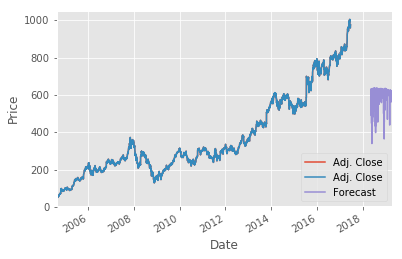

In [34]:
df['Forecast'] = np.nan

import time
last_date = df.iloc[-1].name
last_unix = time.mktime(last_date.timetuple())
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
# 6th video of linear regression

In [36]:
# pickle is serialization of python object

In [38]:
import pickle

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

with open('linearregression.pickl','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickl','rb')
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test,y_test)
print accuracy

0.974292752213


In [40]:
# you can scale linear regression very well
# its 7th video and its about breaking down linear regression
# it works with continous data
# it also depends whether we can perform linear reg on the data

# hw to we define the line is best fitting the data
# let              y = mx + b 
"""
    what m is : m is slope, b is y intercept
    m = (mean(x)*mean(y) - mean(xy)) / (mean(x)^2 - mean(x^2))
    b = mean(y) - m*mean(x)
    
"""

In [ ]:
# video 8

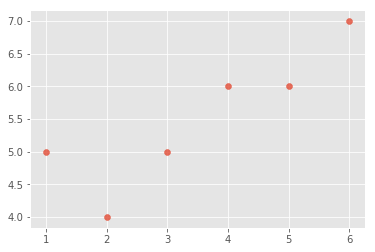

0.485714285714 3.8


In [70]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

xs = [1,2,3,4,5,6]
ys = [5,4,5,6,6,7]

plt.scatter(xs,ys,alpha=0.8)
plt.show()

# we need array not list

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,5,6,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs, ys):
    m = ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( mean(xs)**2 - mean(xs**2) )
    
    b = mean(ys) - m *(mean(xs))
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)

print m, b


In [49]:
# video 9
from matplotlib import style
style.use('fivethirtyeight')

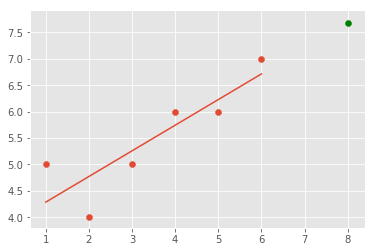

In [71]:
regression_line = [(m*x + b) for x in xs]

predict_x = 8
predict_y = m*predict_x + b


plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()

In [52]:
# now question is how accurate is this line ?
# video 10

In [53]:
# we need to calculate squared error, which will tell how better fit is the line

In [54]:
# why error squared : we only want to face +ve line, but what if a point is a outlier, then penalize the outlier 
# more making square, you can penalize more with increasing power

In [56]:
# r^2 = 1 - (SE(y^)/SE(mean(y)))
# 0.8 means  (SE(y^)/SE(mean(y))) should be 0.2 that mean SE(y^)=2 and SE(mean(y)) = 10
# So high r^2 here mean we have a good fit line

In [83]:
# video 11
# lets calculate squred err
# it is a calculation / there are more methods for accuracy

def squared_err(ys_org, ys_line):
    return sum( (ys_line - ys_org)**2 )

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_err(ys_orig, ys_line)
    squared_error_y_mean = squared_err(ys_orig, y_mean_line)
    return 1 - ( squared_error_regr / squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print r_squared

-0.354653396744


In [61]:
# video 12
# we will talk about testing our assumptions

In [87]:
import random

def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

xs, ys = create_dataset(40,40,2,correlation='pos')


2.28583489681 -5.4987804878
18603.3055347
46452.775


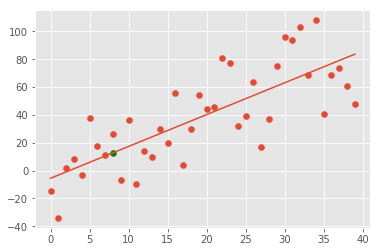

In [91]:
m, b = best_fit_slope_and_intercept(xs, ys)

print m, b
regression_line = [(m*x + b) for x in xs]

r_squared = coefficient_of_determination(ys, regression_line)
# print r_squared

predict_x = 8
predict_y = m*predict_x + b



plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()